# Data

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime
import tensorflow as tf
import IPython

In [92]:
FinanceData = pd.read_csv('daily_price.csv', parse_dates=["Date"])

In [93]:
FinanceData.set_index("Date", inplace=True)

In [94]:
FinanceData

,Vol_Index,Price_Index,Returns_Index
Date,,,
2015-01-30,0.007165,99.898084,0.000013
2015-02-02,0.007164,99.830009,-0.000682
2015-02-03,0.007109,99.307921,-0.005244
2015-02-04,0.007065,99.534347,0.002277
2015-02-05,0.007072,100.198761,0.006653
...,...,...,...
2020-10-05,0.004776,88.831947,0.004238
2020-10-06,0.004784,88.960721,0.001449
2020-10-07,0.004694,88.766072,-0.002190


In [42]:
TweetsData = pd.read_csv('daily_sentiment_final.csv', parse_dates=["date"])
TweetsData.set_index("date", inplace=True)

In [43]:
TweetsData

,neg,neu,pos,compound,compound_multiplied_scaled,volume
date,,,,,,
2016-01-01,0.141111,0.558778,0.300000,0.243633,0.006302,9
2016-01-05,0.107700,0.640600,0.251700,0.245635,0.049407,20
2016-01-08,0.158161,0.669161,0.172710,0.027365,0.016389,31
2016-01-11,0.141150,0.629100,0.229700,0.146015,0.029081,20
2016-01-14,0.154590,0.663077,0.182308,-0.003656,-0.068832,39
...,...,...,...,...,...,...
2019-09-26,0.177599,0.634248,0.188159,0.015107,0.015525,327
2019-09-27,0.170419,0.633557,0.196033,0.055004,-0.005314,246
2019-09-28,0.165416,0.639110,0.195502,0.034502,0.004025,209


## Small Features Engineering

In [230]:
FinanceModi = FinanceData.copy()
#FinanceModi["Vol_Index_5D"] = FinanceModi["Returns_Index"].rolling(5).std()
FinanceModi["Vol_Index_3M"] = FinanceModi["Returns_Index"].rolling(21*3).std()
#FinanceModi["Returns_5D"] = FinanceModi["Returns_Index"].rolling(5).sum()
#FinanceModi["Returns_1M"] = FinanceModi["Returns_Index"].rolling(21).sum()
#FinanceModi["Returns_3M"] = FinanceModi["Returns_Index"].rolling(21*3).sum()

In [231]:
FinanceModi.head()

,Vol_Index,Price_Index,Returns_Index,Vol_Index_3M
Date,,,,
2015-01-30,0.007165,99.898084,0.000013,NaN
2015-02-02,0.007164,99.830009,-0.000682,NaN
2015-02-03,0.007109,99.307921,-0.005244,NaN
2015-02-04,0.007065,99.534347,0.002277,NaN
2015-02-05,0.007072,100.198761,0.006653,NaN


In [444]:
TweetsModi = TweetsData.copy()
TweetsModi["LogVolume"] = np.log(TweetsModi["volume"])

In [445]:
TweetsModi

,neg,neu,pos,compound,compound_multiplied_scaled,volume,LogVolume
date,,,,,,,
2016-01-01,0.141111,0.558778,0.300000,0.243633,0.006302,9,2.197225
2016-01-05,0.107700,0.640600,0.251700,0.245635,0.049407,20,2.995732
2016-01-08,0.158161,0.669161,0.172710,0.027365,0.016389,31,3.433987
2016-01-11,0.141150,0.629100,0.229700,0.146015,0.029081,20,2.995732
2016-01-14,0.154590,0.663077,0.182308,-0.003656,-0.068832,39,3.663562
...,...,...,...,...,...,...,...
2019-09-26,0.177599,0.634248,0.188159,0.015107,0.015525,327,5.789960
2019-09-27,0.170419,0.633557,0.196033,0.055004,-0.005314,246,5.505332
2019-09-28,0.165416,0.639110,0.195502,0.034502,0.004025,209,5.342334


In [447]:
AllData = pd.merge(FinanceModi,TweetsModi, how='inner', left_index=True, right_index=True)

In [448]:
AllData.head()

,Vol_Index,Price_Index,Returns_Index,Vol_Index_3M,neg,neu,pos,compound,compound_multiplied_scaled,volume,LogVolume
2016-01-01,0.003455,103.438625,-0.001283,0.003697,0.141111,0.558778,0.300000,0.243633,0.006302,9,2.197225
2016-01-05,0.003565,103.653246,0.003329,0.003676,0.107700,0.640600,0.251700,0.245635,0.049407,20,2.995732
2016-01-08,0.003374,103.216138,-0.005101,0.003651,0.158161,0.669161,0.172710,0.027365,0.016389,31,3.433987
2016-01-11,0.003408,102.810526,-0.003937,0.003659,0.141150,0.629100,0.229700,0.146015,0.029081,20,2.995732
2016-01-14,0.003450,102.421198,-0.000774,0.003720,0.154590,0.663077,0.182308,-0.003656,-0.068832,39,3.663562


# Transformations

In [122]:
#WorkingData = pd.concat([AllData.shift(1), AllData[["Vol_Index"]]], axis=1).dropna()
#WorkingData.columns = WorkingData.columns[:-1].to_list() + ["Y"]

In [593]:
WorkingData = AllData.copy()
WorkingData.drop(columns="Price_Index", inplace = True)
WorkingData.drop(columns="Returns_Index", inplace = True)
WorkingData.drop(columns="Vol_Index_3M", inplace = True)
WorkingData.drop(columns="pos", inplace = True)
WorkingData.drop(columns="neu", inplace = True)
WorkingData.drop(columns="neg", inplace = True)
WorkingData.drop(columns="compound_multiplied_scaled", inplace = True)
WorkingData.drop(columns="volume", inplace = True)
WorkingData.drop(columns="LogVolume", inplace = True)

In [594]:
WorkingData.head()

,Vol_Index,compound
2016-01-01,0.003455,0.243633
2016-01-05,0.003565,0.245635
2016-01-08,0.003374,0.027365
2016-01-11,0.003408,0.146015
2016-01-14,0.003450,-0.003656


In [595]:
def ConvertData(TrainData, TrainPoints, Y):

    TrainDataY = TrainData[[Y]].iloc[TrainPoints:].copy()

    TrainDataX = np.zeros((TrainDataY.shape[0], TrainPoints, TrainData.shape[1]))

    for i in range(0, TrainPoints):
        
        TrainDataX[:,TrainPoints-i-1,:] = np.array(TrainData.shift(i + 1).iloc[TrainPoints:])

    return TrainDataX, TrainDataY

In [596]:
TrainPoints = 10

DataX, DataY = ConvertData(WorkingData, TrainPoints, "Vol_Index")

In [597]:
DataX.shape

(938, 10, 2)

# Machine Learning

In [598]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, LSTM, GRU, SimpleRNN
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.metrics import confusion_matrix
import seaborn as sns

In [599]:
test_size = DataX.shape[0] // 10

TrainDataX = DataX[:-test_size]
TestDataX  = DataX[-test_size:]

TrainDataY = DataY[:-test_size]
TestDataY = DataY[-test_size:]

In [600]:
TrainDataX.shape

(845, 10, 2)

In [601]:
valid_size = TrainDataX.shape[0] - (TrainDataX.shape[0] // 7)

TrainX, ValidX = TrainDataX[:valid_size], TrainDataX[valid_size:]
TrainY, ValidY = TrainDataY[:valid_size], TrainDataY[valid_size:]

In [602]:
TrainX.shape

(725, 10, 2)

In [603]:
%load_ext tensorboard

logs_dir="logs/fit/"
os.makedirs( ".", exist_ok=True)

log_dir= os.path.join(logs_dir, datetime.datetime.now().strftime("%Y%m%d-%H%M%S") )

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [604]:
def plot_training(history, metrics=[]):
    """
    Plot training and validation statistics
    - accuracy vs epoch number
    - loss     vs epoch number

    From https://www.learnopencv.com/keras-tutorial-fine-tuning-using-pre-trained-models/
    """  

    # Loss
    loss = history.history['loss']

    epochs = range(len(loss))

    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.title('Training loss')
    plt.legend()

    plt.figure()

    for metric in metrics:
        metric_value = history.history[metric]
        plt.plot(epochs, metric_value, 'b', label="Training " + metric)
        plt.title('Training  ' + metric)
        plt.legend()

    plt.show()

In [605]:
batch_size = 32
n_epochs = 40
ModelName = "Model"

es_callback = EarlyStopping(monitor='val_loss', min_delta=.00000005, patience=3, verbose=0, mode='min', baseline=None, restore_best_weights=True)

callbacks = [ es_callback, ModelCheckpoint(filepath=ModelName + ".ckpt", monitor='val_loss', save_best_only=True) ]

In [627]:
Model = Sequential([ LSTM(15, input_shape=(TrainX.shape[1], TrainX.shape[2]), return_sequences = True),
                     LSTM(10, return_sequences = False),
                     Dense(1)])

Model.compile(optimizer='adam', loss="mse", metrics=[ "mse" ])

In [628]:
history = Model.fit(TrainX, TrainY, epochs=n_epochs, batch_size=batch_size, validation_data=(ValidX, ValidY), shuffle=True, callbacks=callbacks)

Epoch 1/40
23/23 [==============================] - 1s 42ms/step - loss: 1.8460e-05 - mse: 1.8460e-05 - val_loss: 5.8240e-06 - val_mse: 5.8240e-06
Epoch 2/40
23/23 [==============================] - 0s 11ms/step - loss: 6.8113e-06 - mse: 6.8113e-06 - val_loss: 2.0855e-06 - val_mse: 2.0855e-06
Epoch 3/40
23/23 [==============================] - 0s 11ms/step - loss: 5.5925e-06 - mse: 5.5925e-06 - val_loss: 1.5686e-06 - val_mse: 1.5686e-06
Epoch 4/40
23/23 [==============================] - 0s 11ms/step - loss: 5.0297e-06 - mse: 5.0297e-06 - val_loss: 1.4732e-06 - val_mse: 1.4732e-06
Epoch 5/40
23/23 [==============================] - 0s 10ms/step - loss: 4.7896e-06 - mse: 4.7896e-06 - val_loss: 1.8966e-06 - val_mse: 1.8966e-06
Epoch 6/40
23/23 [==============================] - 0s 10ms/step - loss: 4.5411e-06 - mse: 4.5411e-06 - val_loss: 1.3617e-06 - val_mse: 1.3617e-06
Epoch 7/40
23/23 [==============================] - 0s 10ms/step - loss: 4.2162e-06 - mse: 4.2162e-06 - val_loss: 1.37

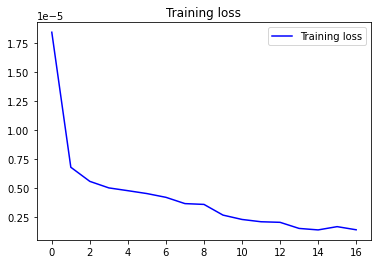

<Figure size 432x288 with 0 Axes>

In [629]:
plot_training(history)

In [637]:
Model.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_31 (LSTM)               (None, 10, 15)            1080      
_________________________________________________________________
lstm_32 (LSTM)               (None, 15)                1860      
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 16        
Total params: 2,956
Trainable params: 2,956
Non-trainable params: 0
_________________________________________________________________


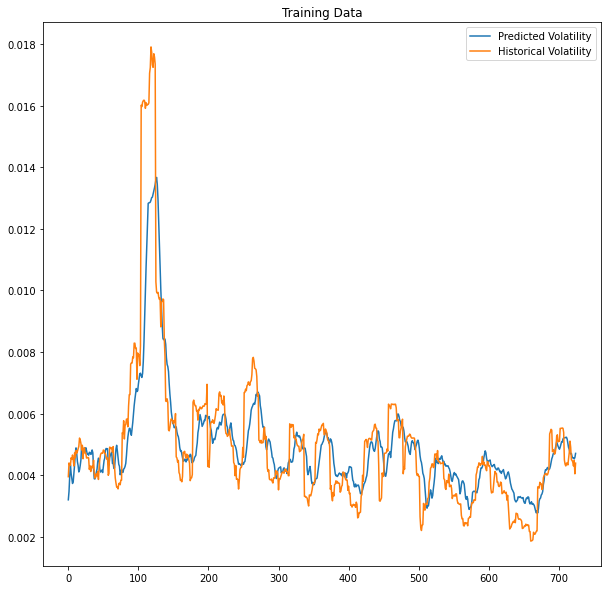

In [638]:
PlotM1 = plt.figure(figsize = (10, 10))
ax = PlotM1.add_subplot(1, 1, 1)
ax.plot(range(0, TrainY.shape[0]), Model.predict(TrainX), range(0, TrainY.shape[0]), TrainY)
ax.set_title('Training Data')
ax.legend(["Predicted Volatility","Historical Volatility"])
plt.show()

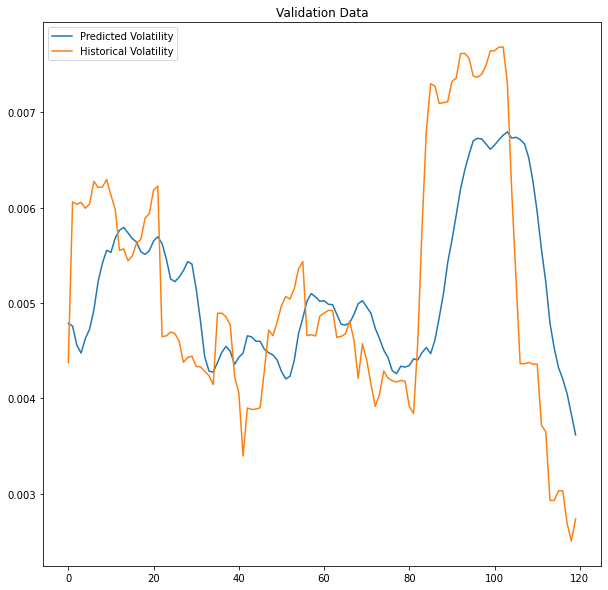

In [639]:
PlotM2 = plt.figure(figsize = (10, 10))
ax = PlotM2.add_subplot(1, 1, 1)
ax.plot(range(0, ValidY.shape[0]), Model.predict(ValidX), range(0, ValidY.shape[0]), ValidY)
ax.set_title('Validation Data')
ax.legend(["Predicted Volatility","Historical Volatility"])

In [649]:
def ConfusionMat(Actual, Prediction):
    
    Direction = ((Actual - Actual.shift(1))>0)*1
    PredictY = pd.DataFrame(Prediction, columns = ["PredictY"])
    Pred_Direction =  ((PredictY - PredictY.shift(1))>0)*1
    
    ConfMatrix = confusion_matrix(Direction, Pred_Direction)
    
    ConfMatrixDf = pd.DataFrame(ConfMatrix, columns=["Negative", "Positive"], index=["Negative", "Positive"])
    ConfMatrixDf.columns.name = "Actual"
    ConfMatrixDf.index.name = "Predicted"
    
    Fig = plt.figure(figsize = (6,6))
    sns.heatmap((ConfMatrixDf), annot=True, fmt="d", cbar=False, cmap=sns.color_palette("Blues"))
    plt.show()
    
    return Fig, ConfMatrixDf

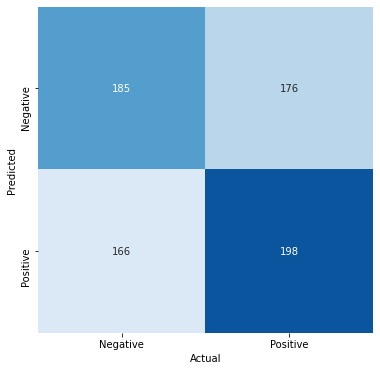

In [650]:
Fig, ConfMatrixDf = ConfusionMat(TrainY, Model.predict(TrainX))

In [655]:
(198+185)/(166+176+198+185)

0.5282758620689655

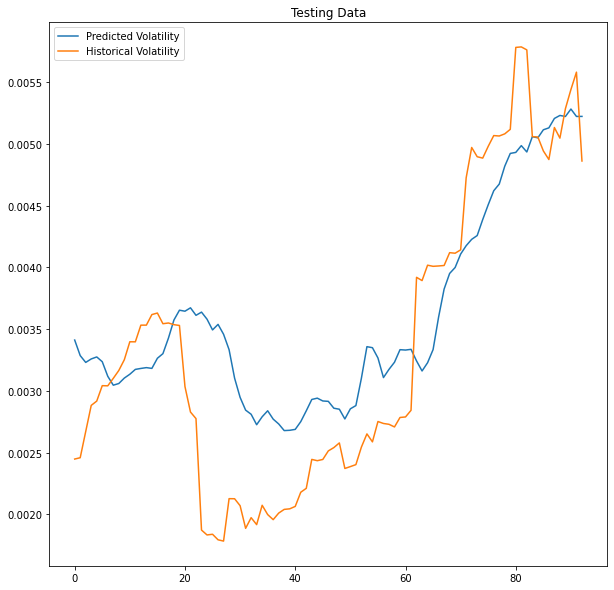

In [646]:
PlotM2 = plt.figure(figsize = (10, 10))
ax = PlotM2.add_subplot(1, 1, 1)
ax.plot(range(0, TestDataY.shape[0]), Model.predict(TestDataX), range(0, TestDataY.shape[0]), TestDataY)
ax.set_title('Testing Data')
ax.legend(["Predicted Volatility","Historical Volatility"])

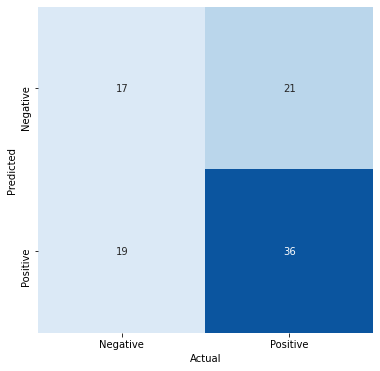

In [651]:
Fig, ConfMatrixDf = ConfusionMat(TestDataY, Model.predict(TestDataX))

In [656]:
(17+36)/(17+36+21+19)

0.5698924731182796

In [270]:
from tensorflow.keras.models import load_model

def saveModel(model, model_path): 
    try:
        os.makedirs(model_path)
    except OSError:
        print("Directory {dir:s} already exists, files will be over-written.".format(dir=model_path))
        
    # Save JSON config to disk
    json_config = model.to_json()
    with open(os.path.join(model_path, 'config.json'), 'w') as json_file:
        json_file.write(json_config)
    # Save weights to disk
    model.save_weights(os.path.join(model_path, 'weights.h5'))
    
    print("Model saved in directory {dir:s}; create an archive of this directory and submit with your assignment.".format(dir=model_path))
    
def loadModel(model_path):
    # Reload the model from the 2 files we saved
    with open(os.path.join(model_path, 'config.json')) as json_file:
        json_config = json_file.read()
    model = tf.keras.models.model_from_json(json_config)
    model.load_weights(os.path.join(model_path, 'weights.h5'))
    
    return model

In [571]:
modelName = "Model4"
model_path = os.path.join("./Models", modelName)
#saveModel(Model, model_path)

Model saved in directory ./Models/Model4; create an archive of this directory and submit with your assignment.


In [635]:
#modelTest = loadModel(model_path)

In [636]:
#Model = modelTest